In [1]:
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import tensorflow as tf

import os

import numpy as np

import matplotlib.pyplot as plt

In [15]:
# Variables are set here, for easy tunning

# directories -----------------------------------------

VALIDATION_DIR = '/home/jack/Documents/data/rps/rps_val'
TRAINING_DIR = '/home/jack/Documents/data/rps/rps_train'
TEST_DIR = '/home/jack/Documents/data/rps/rps_pred'

# directories -----------------------------------------
# model compiler ---------------------------------------

loss = 'categorical_crossentropy'
optimizer='rmsprop'
metrics=['acc']

# model compiler ---------------------------------------
# image generator --------------------------------------

rescale = 1./255
rotation_range = 40
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True
fill_mode = 'nearest'

target_size = (150,150)
class_mode = 'categorical'
batch_size = 126

# image generator --------------------------------------
# model fitting -------------------------------------------------------

epochs=10
steps_per_epoch=20
verbose = 1 
validation_steps = 3
save_name = "rps.h5"

# model fitting -------------------------------------------------------

In [4]:
# model creation -------------------------------------------------------

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# model creation -------------------------------------------------------

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [6]:
# compile -------------------------------------------------------------

model.compile(
    loss = loss, 
    optimizer = optimizer, 
    metrics = metrics
)

# compile -------------------------------------------------------------

In [7]:
# train ---------------------------------------------------------------

train_datagen = ImageDataGenerator(
    rescale = rescale,
    rotation_range = rotation_range,
    width_shift_range = width_shift_range,
    height_shift_range = height_shift_range,
    shear_range = shear_range,
    zoom_range = zoom_range,
    horizontal_flip = horizontal_flip,
    fill_mode = fill_mode
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = target_size,
    class_mode = class_mode,
    batch_size = batch_size
)

# train ---------------------------------------------------------------
# validation ----------------------------------------------------------

validation_datagen = ImageDataGenerator(
    rescale = rescale 
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = target_size,
    class_mode = class_mode,
    batch_size = batch_size
)

# validation ----------------------------------------------------------

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [16]:
# Model Fitting -------------------------------------------------------

history = model.fit(train_generator, 
                    epochs = epochs, 
                    steps_per_epoch = steps_per_epoch, 
                    validation_data = validation_generator, 
                    verbose = verbose, 
                    validation_steps = validation_steps)

model.save(save_name)

# Model Fitting -------------------------------------------------------

Epoch 1/10
20/20 [==============================] - 131s 6s/step - loss: 1.0524 - acc: 0.4472 - val_loss: 1.0441 - val_acc: 0.5887
Epoch 2/10
20/20 [==============================] - 135s 7s/step - loss: 1.0276 - acc: 0.5429 - val_loss: 0.7352 - val_acc: 0.6102
Epoch 3/10
20/20 [==============================] - 129s 6s/step - loss: 0.8613 - acc: 0.6167 - val_loss: 1.1045 - val_acc: 0.4651
Epoch 4/10
20/20 [==============================] - 138s 7s/step - loss: 0.7707 - acc: 0.6524 - val_loss: 0.4377 - val_acc: 0.9651
Epoch 5/10
20/20 [==============================] - 132s 7s/step - loss: 0.8641 - acc: 0.7111 - val_loss: 0.3596 - val_acc: 0.9677
Epoch 6/10
20/20 [==============================] - 139s 7s/step - loss: 0.5667 - acc: 0.7571 - val_loss: 0.4307 - val_acc: 0.9140
Epoch 7/10
20/20 [==============================] - 137s 7s/step - loss: 0.4768 - acc: 0.8016 - val_loss: 0.2752 - val_acc: 0.9086
Epoch 8/10
20/20 [==============================] - 137s 7s/step - loss: 0.5122 - a

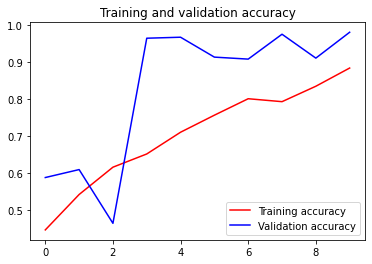

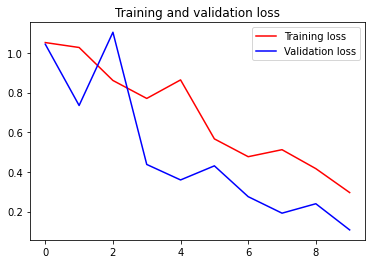

<Figure size 432x288 with 0 Axes>

In [17]:
def plot_results(history):
       
    
    # Plot the results
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()

    plt.show()

plot_results(history)

In [18]:
# preparing data for prediction

test_datagen = ImageDataGenerator(rescale = rescale)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = target_size
)

filenames = test_generator.filenames
nb_samples = len(filenames)

Found 36 images belonging to 1 classes.


In [19]:
classes = model.predict(
    test_generator,
    steps = 2 )

In [20]:
# paper-rock-scissors
#[0.8 - 0.2 - 0.0]

In [21]:
for i in range(nb_samples):
    
#     if classes[i].argmax() == 0:
#         prediction = 'paper'
#     elif classes[i].argmax() == 1:
#         prediction = 'rock'
#     else:
#         prediction = 'scissors'

#     print(f"{filenames[i]} -> {prediction}")
    print(f"{filenames[i].split('/')[-1]} -> {classes[i]}")

paper-hires1.png -> [0.04316065 0.00515586 0.95168346]
paper-hires2.png -> [0.0053971  0.985424   0.00917885]
paper03-047.png -> [1.3156037e-02 1.9707817e-05 9.8682421e-01]
paper05-044.png -> [2.6969929e-07 9.9984848e-01 1.5130208e-04]
paper06-104.png -> [9.9897206e-01 9.5028488e-05 9.3297451e-04]
paper1.png -> [1.8236135e-01 6.7802017e-07 8.1763804e-01]
paper2.png -> [0.27763608 0.00090302 0.7214609 ]
paper3.png -> [9.9999833e-01 1.0868799e-06 6.3354594e-07]
paper4.png -> [3.6498647e-02 2.5922538e-05 9.6347547e-01]
paper5.png -> [3.8488835e-02 8.6189793e-05 9.6142501e-01]
paper6.png -> [7.5214135e-04 9.9900925e-01 2.3849662e-04]
paper7.png -> [4.8745945e-02 6.3195796e-05 9.5119083e-01]
paper8.png -> [6.581545e-02 2.704257e-04 9.339141e-01]
paper9.png -> [1.4236083e-05 9.9998581e-01 4.8630850e-09]
rock-hires1.png -> [9.998330e-01 1.148094e-06 1.657782e-04]
rock-hires2.png -> [2.7048905e-08 9.9999988e-01 1.1016631e-07]
rock1.png -> [9.094193e-06 9.999889e-01 2.052280e-06]
rock2.png -> [